In [48]:
import numpy as np
from PIL import Image
from webcolors import rgb_to_name
import cv2
from sklearn.cluster import KMeans
from collections import Counter
import webcolors
import os
import glob
import pandas as pd

In [3]:
path = 'monet2photo/trainA'

In [4]:
file_try = 'monet2photo/trainA/00003.jpg'

In [5]:
#Palette Function
def palette(img):
    """
    Return palette in descending order of frequency
    """
    arr = np.asarray(img)
    palette, index = np.unique(asvoid(arr).ravel(), return_inverse=True)
    palette = palette.view(arr.dtype).reshape(-1, arr.shape[-1])
    count = np.bincount(index)
    order = np.argsort(count)
    return palette[order[::-1]]

def asvoid(arr):
    """View the array as dtype np.void (bytes)
    This collapses ND-arrays to 1D-arrays, so you can perform 1D operations on them.
    http://stackoverflow.com/a/16216866/190597 (Jaime)
    http://stackoverflow.com/a/16840350/190597 (Jaime)
    Warning:
    >>> asvoid([-0.]) == asvoid([0.])
    array([False], dtype=bool)
    """
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))

In [6]:
img = Image.open(file_try, 'r').convert('RGB')

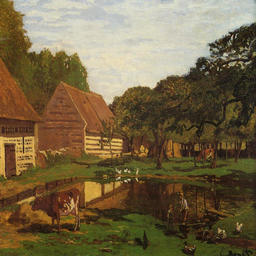

In [7]:
img

In [8]:
#palette(img) returns a numpy array. Each row can be interpreted as a color:
print(palette(img))
save = palette(img)

[[214 211 192]
 [216 215 197]
 [215 212 193]
 ...
 [116 112 103]
 [116 112 109]
 [  9   8  13]]


In [9]:
#To get the top ten colors:
palette(img)[:10]

array([[214, 211, 192],
       [216, 215, 197],
       [215, 212, 193],
       [216, 213, 194],
       [217, 214, 195],
       [217, 216, 195],
       [208, 206, 191],
       [219, 216, 197],
       [215, 214, 196],
       [215, 214, 193]], dtype=uint8)

In [10]:
palette(img)[1]

array([216, 215, 197], dtype=uint8)

In [11]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [12]:
requested_colour = (216, 215, 197)
actual_name, closest_name = get_colour_name(requested_colour)

In [13]:
print ("Actual colour name:", actual_name, ", closest colour name:", closest_name)

Actual colour name: None , closest colour name: lightgrey


In [14]:
#Load images from folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [15]:
#Dataset: Images in form of array (for future)
dataset = load_images_from_folder(path)

In [16]:
#Painting Names
paint_names = [f for f in glob.glob('monet2photo/trainA/*.jpg')]

In [17]:
#Path of paintings
paint_names

['monet2photo/trainA/00654.jpg',
 'monet2photo/trainA/01238.jpg',
 'monet2photo/trainA/00126.jpg',
 'monet2photo/trainA/00668.jpg',
 'monet2photo/trainA/01204.jpg',
 'monet2photo/trainA/00697.jpg',
 'monet2photo/trainA/00683.jpg',
 'monet2photo/trainA/00873.jpg',
 'monet2photo/trainA/00867.jpg',
 'monet2photo/trainA/00456.jpg',
 'monet2photo/trainA/00324.jpg',
 'monet2photo/trainA/00442.jpg',
 'monet2photo/trainA/00318.jpg',
 'monet2photo/trainA/01006.jpg',
 'monet2photo/trainA/00495.jpg',
 'monet2photo/trainA/00481.jpg',
 'monet2photo/trainA/00522.jpg',
 'monet2photo/trainA/00244.jpg',
 'monet2photo/trainA/00536.jpg',
 'monet2photo/trainA/01166.jpg',
 'monet2photo/trainA/00278.jpg',
 'monet2photo/trainA/01172.jpg',
 'monet2photo/trainA/00287.jpg',
 'monet2photo/trainA/01199.jpg',
 'monet2photo/trainA/00046.jpg',
 'monet2photo/trainA/00734.jpg',
 'monet2photo/trainA/00052.jpg',
 'monet2photo/trainA/00708.jpg',
 'monet2photo/trainA/00091.jpg',
 'monet2photo/trainA/00907.jpg',
 'monet2ph

In [18]:
#Palette of all the images
pal = []
for i in paint_names:
    img = Image.open(i, 'r').convert('RGB')
    pal.append(palette(img))

In [19]:
#Length of Palette
len(pal)

1072

In [20]:
#Length of paintings
len(paint_names)

1072

(42499, 3)


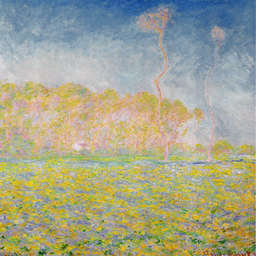

In [21]:
#Palette size of painting 0
print(pal[0].shape)
Image.open(paint_names[0], 'r').convert('RGB')

(56522, 3)


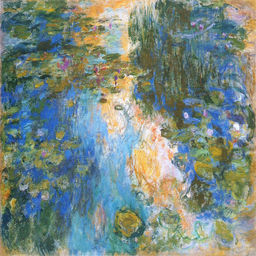

In [22]:
#Palette size of painting 1 
print(pal[1].shape)
Image.open(paint_names[1], 'r').convert('RGB')

(11703, 3)


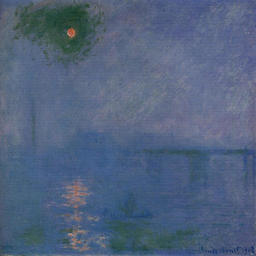

In [23]:
print(pal[2].shape)
Image.open(paint_names[2], 'r').convert('RGB')

In [33]:
pal[:5]

[array([[189, 193, 196],
        [196, 196, 196],
        [200, 200, 200],
        ...,
        [187, 188, 122],
        [187, 188, 120],
        [  0,  78,   0]], dtype=uint8),
 array([[ 85,  95,  71],
        [ 67,  89,  77],
        [ 63,  95,  90],
        ...,
        [142, 149,  82],
        [142, 148, 134],
        [ 10,  69, 161]], dtype=uint8),
 array([[ 88, 103, 132],
        [ 89, 104, 133],
        [ 90, 105, 134],
        ...,
        [ 78,  92,  95],
        [ 78,  92, 121],
        [ 17,  39,  78]], dtype=uint8),
 array([[160, 177, 203],
        [159, 178, 211],
        [181, 192, 212],
        ...,
        [146, 141, 137],
        [146, 141, 121],
        [ 21,  21,  23]], dtype=uint8),
 array([[109, 136,  83],
        [ 95, 119,  25],
        [140, 166, 155],
        ...,
        [109, 154, 151],
        [109, 154, 149],
        [  0,   2,  17]], dtype=uint8)]

In [54]:
#Converting to dataframe 
pal = pd.DataFrame(pal, dtype='object')
pal.columns = ['Paintings RGB']

In [56]:
#Paintings RGB
pal.head()

,Paintings RGB
0,"[[189, 193, 196], [196, 196, 196], [200, 200, ..."
1,"[[85, 95, 71], [67, 89, 77], [63, 95, 90], [68..."
2,"[[88, 103, 132], [89, 104, 133], [90, 105, 134..."
3,"[[160, 177, 203], [159, 178, 211], [181, 192, ..."
4,"[[109, 136, 83], [95, 119, 25], [140, 166, 155..."


In [70]:
#Painting shape
print(pal.shape)

(1072, 1)


In [75]:
pal.iloc[0,0]

array([[189, 193, 196],
       [196, 196, 196],
       [200, 200, 200],
       ...,
       [187, 188, 122],
       [187, 188, 120],
       [  0,  78,   0]], dtype=uint8)

In [76]:
#Loading converted dataset
generated_path = 'Generated_Paintings/'

In [77]:
#Generated names
gen_names = [f for f in glob.glob('Generated_Paintings/*.png')]

In [78]:
#Generated output names 
gen_names

['Generated_Paintings/348.png',
 'Generated_Paintings/412.png',
 'Generated_Paintings/374.png',
 'Generated_Paintings/360.png',
 'Generated_Paintings/406.png',
 'Generated_Paintings/638.png',
 'Generated_Paintings/176.png',
 'Generated_Paintings/88.png',
 'Generated_Paintings/610.png',
 'Generated_Paintings/604.png',
 'Generated_Paintings/162.png',
 'Generated_Paintings/189.png',
 'Generated_Paintings/77.png',
 'Generated_Paintings/63.png',
 'Generated_Paintings/228.png',
 'Generated_Paintings/566.png',
 'Generated_Paintings/200.png',
 'Generated_Paintings/214.png',
 'Generated_Paintings/572.png',
 'Generated_Paintings/599.png',
 'Generated_Paintings/598.png',
 'Generated_Paintings/215.png',
 'Generated_Paintings/573.png',
 'Generated_Paintings/567.png',
 'Generated_Paintings/201.png',
 'Generated_Paintings/229.png',
 'Generated_Paintings/62.png',
 'Generated_Paintings/188.png',
 'Generated_Paintings/76.png',
 'Generated_Paintings/605.png',
 'Generated_Paintings/163.png',
 'Generated_P

In [79]:
#Palette of all the generated images
pal_gen = []
for i in gen_names:
    img = Image.open(i, 'r').convert('RGB')
    pal_gen.append(palette(img))

In [80]:
#Length of pallete
len(pal_gen)

752

In [81]:
#Top 5 pallete
pal_gen[:5]

[array([[222, 226, 214],
        [223, 225, 215],
        [227, 230, 218],
        ...,
        [153, 108,  82],
        [153, 108,  72],
        [  0,  18,   6]], dtype=uint8),
 array([[108, 150, 196],
        [104, 148, 195],
        [115, 154, 190],
        ...,
        [159, 182, 165],
        [159, 182, 159],
        [  0,  12,  22]], dtype=uint8),
 array([[223, 229, 223],
        [113, 122, 103],
        [223, 232, 230],
        ...,
        [141, 155, 214],
        [141, 155, 138],
        [  0,  11,  10]], dtype=uint8),
 array([[ 37,  25,   5],
        [ 16,  14,   5],
        [ 38,  27,   4],
        ...,
        [157, 175, 158],
        [157, 175, 150],
        [  4,   5,   4]], dtype=uint8),
 array([[181, 200, 231],
        [185, 202, 233],
        [182, 202, 233],
        ...,
        [136, 131, 115],
        [136, 129, 124],
        [  0,   4,   4]], dtype=uint8)]

(62172, 3)


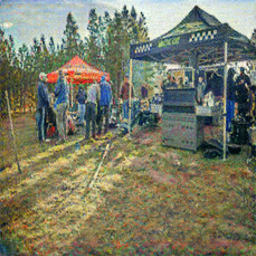

In [82]:
#Shape of second file
print(pal_gen[2].shape)
Image.open(gen_names[2], 'r').convert('RGB')

In [83]:
#Checking shape of 4
pal_gen[4].shape

(53478, 3)

In [87]:
#Convert to dataframe
pal_gen = pd.DataFrame(pal_gen, dtype='object')

In [90]:
#Chainging column name and pritning first 5 values
pal_gen.columns = ['Generated Painting RGB']
pal_gen.head()

,Generated Painting RGB
0,"[[222, 226, 214], [223, 225, 215], [227, 230, ..."
1,"[[108, 150, 196], [104, 148, 195], [115, 154, ..."
2,"[[223, 229, 223], [113, 122, 103], [223, 232, ..."
3,"[[37, 25, 5], [16, 14, 5], [38, 27, 4], [27, 1..."
4,"[[181, 200, 231], [185, 202, 233], [182, 202, ..."
